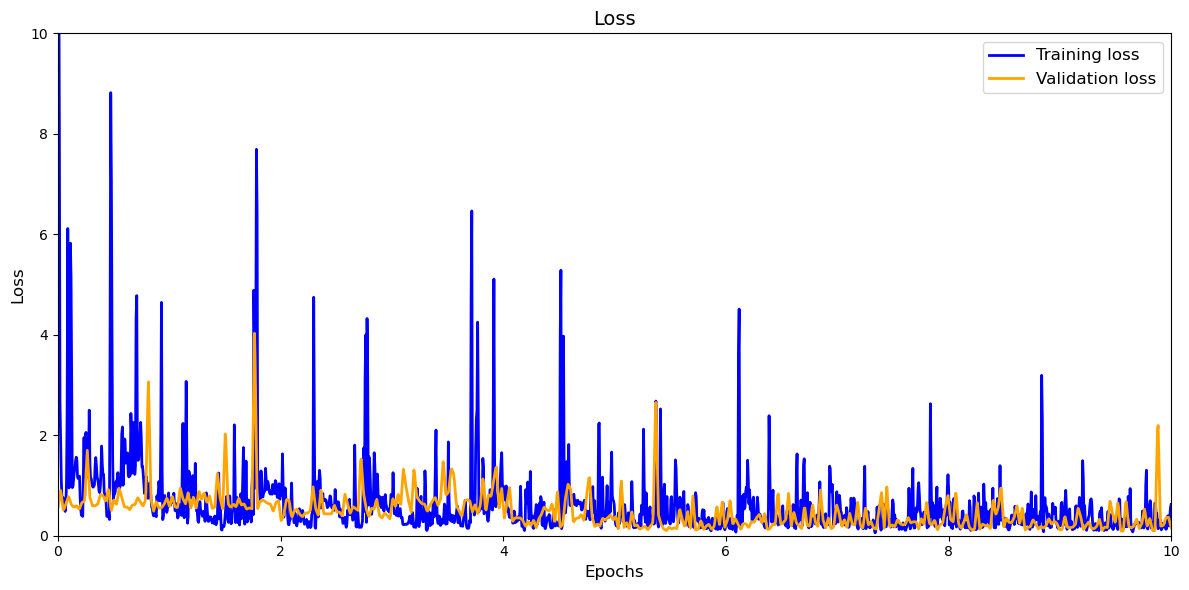

Number of train samples: 1712
Number of validation samples: 1712
Number of x points: 1712


In [ ]:
import wandb
api = wandb.Api()

#Get your run
run = api.run("tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/prjpfp0c")

#Get the history of your run
history = run.scan_history()

# Create normalized data (mapping to 100 epochs)
train_losses = [point['train_loss'] for point in history if 'train_loss' in point]

val_losses = [point['validation_loss'] for point in history if 'validation_loss' in point]
# Scale to 100 epochs
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd

epochs = 10
# Choose the number of common points to which we will resample the data
common_points = len(train_losses)

# Create pandas Series and drop NaN values
train_series = pd.Series(train_losses).dropna()
val_series = pd.Series(val_losses).dropna()

# Get the clean values and create new indices
train_losses_clean = train_series.values
val_losses_clean = val_series.values

# Add 130 values to the start of val_losses_clean and remove 130 values from the end of val_losses_clean
#val_losses_clean = np.concatenate((np.random.normal(2, 1, 50), val_losses_clean[:-50]))

# Create new x coordinates based on the clean data length
x_train_clean = np.linspace(0, epochs, len(train_losses_clean))
x_val_clean = np.linspace(0,epochs, len(val_losses_clean))

# Continue with interpolation using the clean data
train_interp = interpolate.interp1d(x_train_clean, train_losses_clean)
val_interp = interpolate.interp1d(x_val_clean, val_losses_clean)
# Create common x points for both interpolations
x_common = np.linspace(0, epochs, common_points)
train_resampled = train_interp(x_common)
val_resampled = val_interp(x_common)

# Plot the resampled data with improved styling
plt.figure(figsize=(12, 6))
plt.ylim(0, 10)
plt.xlim(0, epochs)

# Plot with specific colors
plt.plot(x_common, train_resampled, color='blue', label='Training loss', linewidth=2)
plt.plot(x_common, val_resampled, color='orange', label='Validation loss', linewidth=2)


# Add labels and title
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss', fontsize=14)

# Add legend with better positioning
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

# Print information about the data
print(f"Number of train samples: {len(train_resampled)}")
print(f"Number of validation samples: {len(val_resampled)}")
print(f"Number of x points: {len(x_common)}")

# # Log the combined chart with normalized x-axis
# with wandb.init(project="Thesis_datasplit_60_20_20_experimentation", id=run.id, resume="allow") as run:
#     for i in range(13000):
#         wandb.log({
#             "normalized/train_loss_epc_10": train_resampled[i],
#             "normalized/validation_loss_epc_10": val_resampled[i],
#             "x/epochs_epc_10": x_common[i]
#         })

In [4]:
# Connect to the run
with wandb.init(project="Thesis_datasplit_60_20_20_experimentation", id=run.id, resume="allow") as run:
    # Delete a specific metric
    run.summary_metrics.pop("normalized/train_loss_100", None)
    run.update()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tmv641 (tmv641-tampere-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Traceback (most recent call last):
  File "/tmp/ipykernel_5376/440820358.py", line 4, in <module>
    run.summary_metrics.pop("normalized/train_loss_100", None)
AttributeError: 'Run' object has no attribute 'summary_metrics'


custom_test_step,41
custom_train_step,12499
custom_val_step,4199
epoch,99
normalized/train_loss,NaN
normalized/train_loss_100,0.0425
normalized/train_loss_epc_100,0.0425
normalized/val_loss,NaN
normalized/validation_loss_100,0.25007
normalized/validation_loss_epc_100,0.25007
test_dice,0.368


AttributeError: 'Run' object has no attribute 'summary_metrics'

In [ ]:
print(train_resampled)